In [6]:
import pandas as pd

In [7]:
credit_data = pd.read_csv("creditcard_2023.csv")

In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [9]:
credit_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [10]:
credit_data.tail()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [11]:
#correlation matrix

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score)

In [13]:
#2. Train/Test Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(credit_data, credit_data["Class"]):
    train_set = credit_data.loc[train_index]
    test_set = credit_data.loc[test_index]

In [14]:
#Separate features and labels from training and testing data
x_train = train_set.drop(["Class", "id"], axis=1)
y_train = train_set["Class"]
x_test = test_set.drop(["Class", "id"], axis=1)
y_test = test_set["Class"]

In [15]:
#3. Creating model pipeline
scale_pos_weight = (y_train==0).sum() / (y_train==1).sum()

In [16]:
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

In [17]:
tree_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

In [18]:
forest_pipeline = Pipeline([
    ("model", RandomForestClassifier(
        n_estimators=100,
        max_depth=10,        # limit tree depth
        min_samples_split=5, # reduce overfitting + speed
        random_state=42
    ))
])

In [19]:
xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", xgb.XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight))
])
print("Pipelines created!")

Pipelines created!


In [20]:
#4. Train each model and evaluate
#Logistic Regression
log_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [21]:
y_pred_log = log_reg_pipeline.predict(x_test)

In [23]:

print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall:  {recall_score(y_test, y_pred_log)}")
print(f"F1:      {f1_score(y_test, y_pred_log)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log)}")

Precision: 0.977170185887024
Recall:  0.9522009039269824
F1:      0.9645239728162603
Confusion Matrix:
[[55598  1265]
 [ 2718 54145]]
Accuracy:  96.4977


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
cm = confusion_matrix(y_test, y_pred_log)


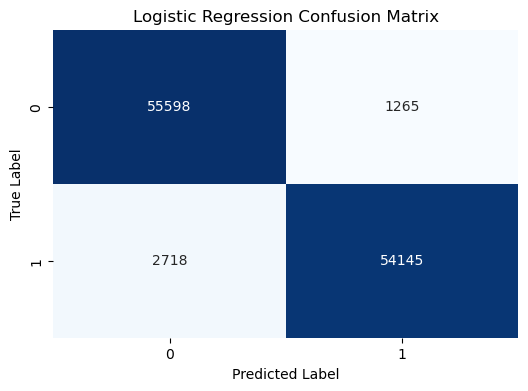

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [31]:
#Decision Tree
tree_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [38]:
y_pred_tree = tree_pipeline.predict(x_test)


In [39]:
print(f"Precision: {precision_score(y_test, y_pred_tree)}")
print(f"Recall:  {recall_score(y_test, y_pred_tree)}")
print(f"F1:      {f1_score(y_test, y_pred_tree)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tree)}")

Precision: 0.9968404423380727
Recall:  0.9987162126514605
F1:      0.9977774459076015
Confusion Matrix:
[[56683   180]
 [   73 56790]]


In [40]:
cm = confusion_matrix(y_test, y_pred_tree)

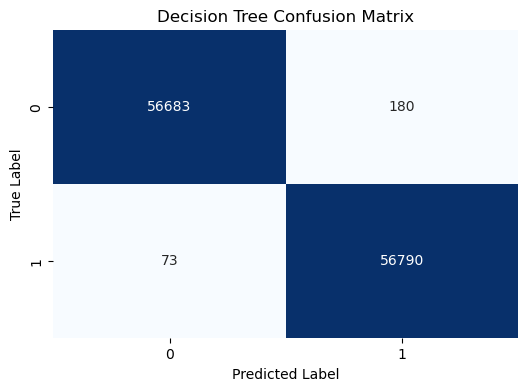

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [59]:
#Random Forest

Before training


Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        random_state=42))])

In [ ]:
y_pred_forest = forest_pipeline.predict(x_test)


In [62]:
print("After training")
print(f"Precision: {precision_score(y_test, y_pred_forest)}")
print(f"Recall:  {recall_score(y_test, y_pred_forest)}")
print(f"F1:      {f1_score(y_test, y_pred_forest)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_forest)}")

After training
Precision: 0.9982674607471576
Recall:  0.9727590876316762
F1:      0.9853482137290355
Confusion Matrix:
[[56767    96]
 [ 1549 55314]]


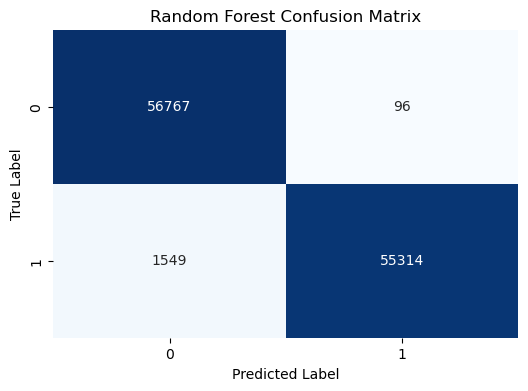

In [79]:
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [58]:
#XGBoost
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [56]:
y_pred_xgb = xgb_pipeline.predict(x_test)


In [52]:
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall:  {recall_score(y_test, y_pred_xgb)}")
print(f"F1:      {f1_score(y_test, y_pred_xgb)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")

Precision: 0.9994024289505598
Recall:  1.0
F1:      0.9997011251758087
Confusion Matrix:
[[56829    34]
 [    0 56863]]


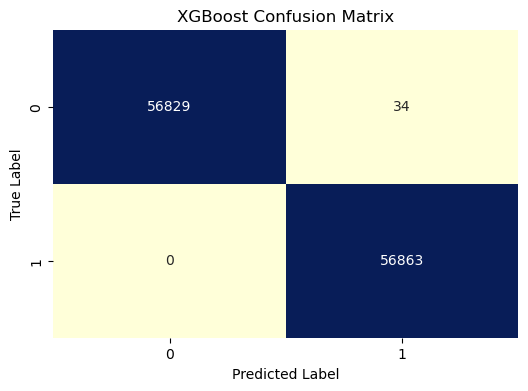

In [89]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()